In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os, subprocess
import glob
import math
import sys  
sys.path.insert(0, './src/')
from clusterdata import ClusterInfo
np.set_printoptions(suppress=True,precision=10)

In [3]:
# clus = ClusterInfo( 
#     clusters_fname="BCC_A2/sqs_lev=3_a_Mo=0.33333,a_V=0.33333,a_W=0.33333/clusters.out",
#     eci_fname="BCC_A2/sqs_lev=3_a_Mo=0.33333,a_V=0.33333,a_W=0.33333/eci.out",
#     kb_fname="BCC_A2/sqs_lev=3_a_Mo=0.33333,a_V=0.33333,a_W=0.33333/configkb.out",
#     clustermult_fname="BCC_A2/sqs_lev=3_a_Mo=0.33333,a_V=0.33333,a_W=0.33333//clusmult.out",
#     configmult_fname="BCC_A2/sqs_lev=3_a_Mo=0.33333,a_V=0.33333,a_W=0.33333/configmult.out",
#     config_fname="BCC_A2/sqs_lev=3_a_Mo=0.33333,a_V=0.33333,a_W=0.33333/config.out",
#     vmat_fname="BCC_A2/sqs_lev=3_a_Mo=0.33333,a_V=0.33333,a_W=0.33333/vmat.out", 
# )

In [2]:
clus = ClusterInfo( 
    clusters_fname="../CVM_IrRu/test/clusters.out",
    eci_fname="../CVM_IrRu/test/eci.out",
    kb_fname="../CVM_IrRu/test/configkb.out",
    clustermult_fname="../CVM_IrRu/test/clusmult.out",
    configmult_fname="../CVM_IrRu/test/configmult.out",
    config_fname="../CVM_IrRu/test/config.out",
    vmat_fname="../CVM_IrRu/test/vmat.out", 
)

Reading ECIs from existing file eci.out.


In [20]:
disord = np.array([1, *np.zeros(4)])
jitter = np.array([0, *np.random.normal(0.0,0.1,4)])

In [21]:
clus.print_rho(disord+jitter)

[1.]
[0.475 0.525]
[0.253 0.222 0.303]
[0.164 0.088 0.134 0.17 ]
[0.121 0.043 0.045 0.088 0.082]


In [3]:
results = {}
for res in glob.glob('/home/sayan/Research/CVM_IrRu/FCC_A1/sqs_lev=*/result*'):
    if '-cons' in res:
        name = res.split('/')[-2]
        name = name.replace('sqs_lev=4_','')
        name = name.replace('sqs_lev=3_','')
    
        results[name+'-cons'] = pd.read_json(res).drop('corrs',axis=1)
    else:
        name = res.split('/')[-2]
        name = name.replace('sqs_lev=4_','')
        name = name.replace('sqs_lev=3_','')
    
        results[name+'-nocons'] = pd.read_json(res).drop('corrs',axis=1)

In [4]:
results.keys()

dict_keys(['sqs_lev=1_a_Ir=0.5,a_Ru=0.5-cons', 'sqs_lev=1_a_Ir=0.5,a_Ru=0.5-nocons', 'sqs_lev=2_a_Ir=0.25,a_Ru=0.75-cons', 'sqs_lev=2_a_Ir=0.25,a_Ru=0.75-nocons', 'sqs_lev=2_a_Ir=0.75,a_Ru=0.25-cons', 'sqs_lev=2_a_Ir=0.75,a_Ru=0.25-nocons'])

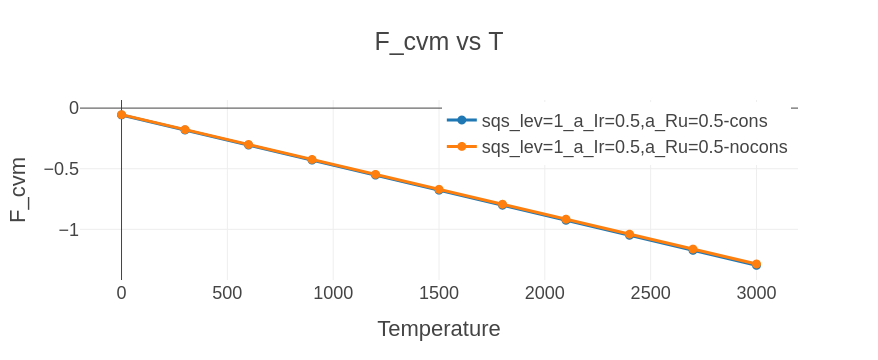

In [6]:
fig = go.Figure()
struc = 'Ir=0.5,a_Ru=0.5'
for name, df in results.items():
    if struc in name:
        fig.add_trace(go.Scatter(x=df['temperature'],
                                 y=df['F_cvm'],
                                 mode='markers+lines',
                                 name=f'{name}'
                                )
                     )

fig.update_layout(
    title="F_cvm vs T",
    xaxis_title="Temperature",
    yaxis_title="F_cvm",
    template='presentation'
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='top center')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99
))
fig.show()

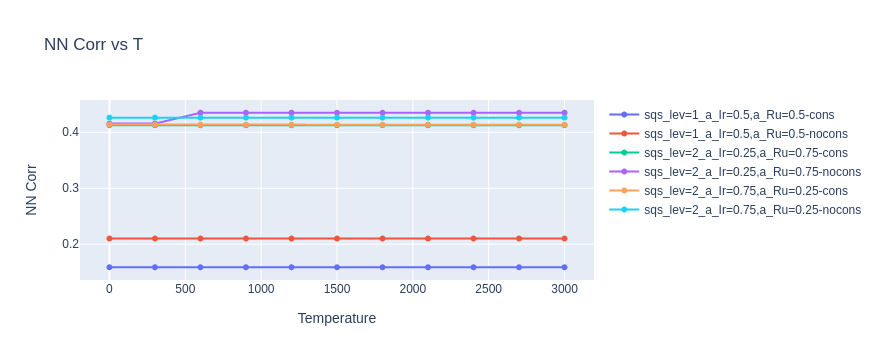

In [7]:
fig = go.Figure()

for name, df in results.items():
    fig.add_trace(go.Scatter(x=df['temperature'],
                             y=df['corr 2'],
                             mode='markers+lines',
                             name=f'{name}'
                            )
                 )

fig.update_layout(
    title="NN Corr vs T",
    xaxis_title="Temperature",
    yaxis_title="NN Corr",
    #template='presentation'
)
#fig.update_traces(texttemplate='%{text:.2s}', textposition='top center')
# fig.update_layout(legend=dict(
#     yanchor="bottom",
#     y=0.01,
#     xanchor="right",
#     x=0.99
# ))
#fig.update_yaxes(range=[-1, 1])
fig.show()

In [96]:
results['a_Ta=0.33333,a_V=0.33333,a_W=0.33333-cons'].F_cvm

0    -0.215095
1    -0.284447
2    -0.354493
3    -0.425178
4    -0.496423
5    -0.568152
6    -0.640296
7    -0.712795
8    -0.785601
9    -0.858673
10   -0.931979
11   -1.005492
12   -1.079194
13   -1.153071
14   -1.227114
Name: F_cvm, dtype: float64

In [97]:
results['a_Ta=0.5,a_V=0.25,a_W=0.25-cons'].F_cvm

0    -0.206004
1    -0.273437
2    -0.341641
3    -0.410562
4    -0.480119
5    -0.550233
6    -0.620834
7    -0.691862
8    -0.763267
9    -0.835007
10   -0.907048
11   -0.979362
12   -1.051921
13   -1.124717
14   -1.197721
Name: F_cvm, dtype: float64